로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- BreastCancer.csv

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [13]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [14]:
X = np.hstack((pass_time,fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [15]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

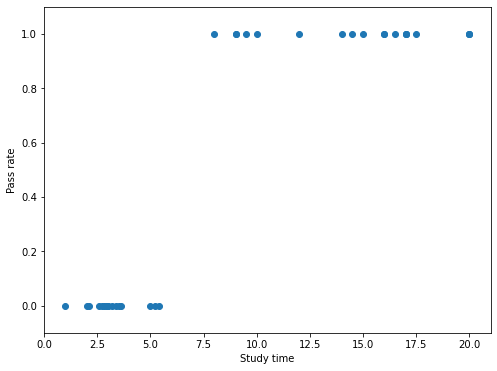

In [16]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [17]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

[[1.32952239]]
[-9.1854821]


In [18]:
model.predict(6.9)

ValueError: Expected 2D array, got scalar array instead:
array=6.9.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model.predict_proba(13)

In [ ]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5,21, 100)
yy = logreg(model.coef_*XX + model.intercept_)[0]
plt.plot(XX, yy, c='r')
# plt.show()

In [ ]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a=2
b=-5
XX = np.linspace(-10, 10, 100)
yy = logreg(a*XX + b)
plt.plot(XX, yy, c='r')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn import metrics

In [ ]:
data = pd.read_csv('data/breast_cancer.csv')
print(data.shape)

In [ ]:
data.head()

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

In [ ]:
model=LogisticRegression()
y = df["diagnosis"]

In [ ]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

In [ ]:
X_test.shape

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [ ]:
features = ["texture_mean"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [ ]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

In [ ]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

In [ ]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
X=data.drop('diagnosis', axis=1)

In [ ]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

In [ ]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

## 소프트맥스
- 다항 로지스틱스

In [ ]:
s=[0.1, 0.5, 0.76, .3, .6, .2]

p = []
sum = 0
for i in range(len(s)):
    p.append(np.exp(s[i]))
    sum = sum + np.exp(s[i])
# print(p)  

p = p/sum
print(p.round(3))

 # ----------연습장----------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
pass_time = [8.9, 9, 9.5, 10, 12, 14, 14.5 , 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1, 2.6, 2.7, 2.8, 2.9, 3, 3.2, 3.4, 3.5, 3.6, 3, 5, 5.2, 5.4]
#passtime, failtime은 임의로 주다, 
#합격자 명단을 받아보니깐 passtime [~] 이정도 되는 사람들이 합격을 했고,
#failtime [~] 이정도 되는 사람들을 떨어졌다

In [3]:
X = np.hstack((pass_time, fail_time))  #pass time과 failtime을 옆으로 묶다
X

array([ 8.9,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. , 16.5,
       17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,  5.2,
        5.4])

In [6]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y
#X로 부터 y를 구하는 관계식을 만들다

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

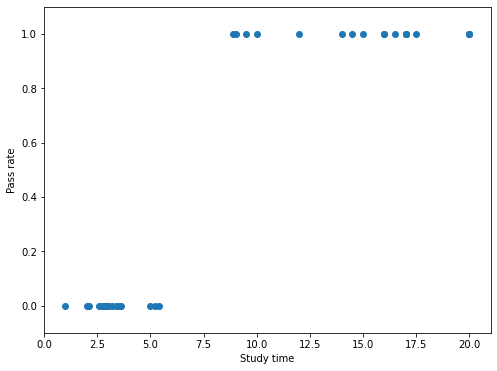

In [7]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X,y)
plt.show()

#먼저 그림을 그려보다
#X축에는 공부한 시간, y축에는 레이블 값

In [10]:
#파이썬으로 로지스틱 함수를 사용하다
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)
#입력과 출력을 2차원 데이터로 받다
print(model.coef_)
print(model.intercept_)

[[1.26070123]]
[-9.0911983]


In [11]:
model.predict(4)

ValueError: Expected 2D array, got scalar array instead:
array=4.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model.predict_proba(7)

In [ ]:
model.predict_proba(7)
#-> array([0.7, 0.2])  #떨어질 확률이 0.7 , 붙을 확률이 0.2

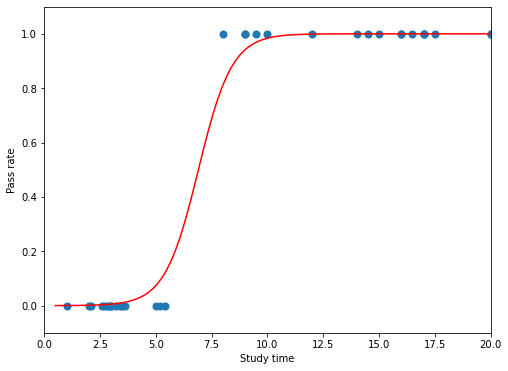

In [19]:
#logistic regression 함수를 정의하다
def logreg(z):  #입력값을 주면
    return 1/(1+np.exp(-z))  #로지스틱 식을 계산하다

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)  #점의 크기를 50으로 두다


XX = np.linspace(0.5, 21, 100)  #0.5부터 21까지 100개로 나누어서
yy = logreg(model.coef_ *XX + model.intercept_)[0]
plt.plot(XX, yy, c='r') #빨간색으로 그림을 그리다


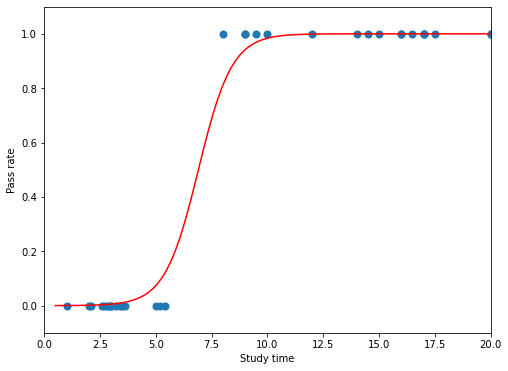

In [20]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5,21, 100)
yy = logreg(model.coef_*XX + model.intercept_)[0]  #[0]:다차항이라고 인식하고 있기에, 첫번째 항만 그리라는 의미이다 
plt.plot(XX, yy, c='r')
# plt.show()

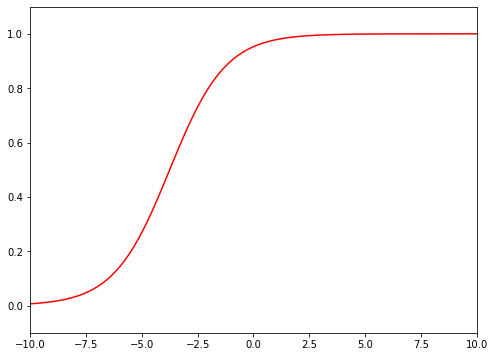

In [21]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a=0.8
b=3
XX = np.linspace(-10,10, 100)
yy = logreg(a*XX +b)
plt.plot(XX, yy, c='r')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold  #K-fold cross validation
from sklearn import metrics

In [23]:
data = pd.read_csv('data/breat_cancer.csv')
print(data.shape)

(569, 33)


In [24]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

#diagnosis 가 M으로 되면 컴퓨터가 인식하지 못한다.
#인식하게 좋게 1과 0으로 바꾸다

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


In [26]:
model=LogisticRegression()  #model을 logisticregression 함수 지정하다
y = df["diagnosis"]  #목적변수를 diagnosis 로 하다

In [27]:
features = ["radius_mean"]#속성값으로 radius_mean 사용하다, 속성값을 하나만 사용하다
X = df[features]  #radius는 반경을 뜻한다. 종양 반경
np.random.seed(11) #11번으로 고정하다

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0: .2%}".format(model.score(X_test, y_test)))  
#X_test, y_test를 넣어 score를 나오게 하다
#Score:  85.38%
#logistic regression은 regression이 들어갔지만, 분류모형으로 속한다
#악성이냐, 양성이냐 분류해주다분류해주는 score는 얼마나 맞추냐는 뜻이다.

Score:  85.38%


In [ ]:
X_test.shape  #171개의 샘플데이터는 85%는 악성과 양성을 맞추다

In [28]:
print(model.coef_)  #a, b값을 출력하다  #[[1.03283783]] : a값은 2차원 array처럼 보이는데 하나의 약속이다.
#로지스틱 회귀에서 입력변수를 하나써서 그런거지, 2,3..개 쓸 수 있다.
#여러개의 특성을 고려하기에 일반화하기 위해 2차원으로 하다
print(model.intercept_)   

[[1.03283783]]
[-15.35824085]


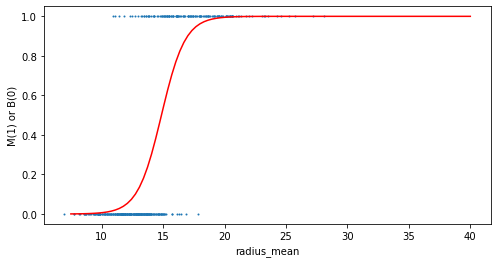

In [29]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1+ np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0],c='r' )

#파란점은 radius_mean을 보고, 사이즈에 따라 정상인지, 악성인지


In [30]:
features = ["texture_mean"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0: .2%}".format(model.score(X_test, y_test)))

#Score:  69.59% : 69% 밖에 되지 않는다. 이 texture_mean으로는 구분하기 힘들다는 뜻이다.


Score:  69.59%


In [31]:
print(model.coef_)
print(model.intercept_)

[[0.24875651]]
[-5.42869688]


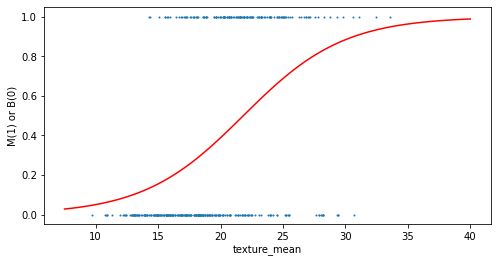

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0],c='r' )

#위 아래 파란색 점 사이에는 별 차이가 없다
#아래 데이터가 조오오금 작다
#texture_mean으로는 별로 도움이 되지 않다

In [33]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

#feature에 radius와 texture 넣은 다음, feature 전체를 X라고 두다
#조금 올라가다

Score: 89.47%


Text(0, 0.5, 'texture_mean')

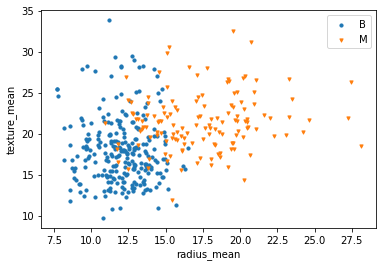

In [34]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]  #y_train은 0 아니면 1이다
#처음에는 0인 것을 먼저 다 하는데, 점은 먼저 찍는데 0일때 marker -> o
#label -> B 를 갖는다. 0일때 양성인 점 먼저 찍다
    ys = X_train["texture_mean"][y_train == i]
#for 1 인 경우에는 악성인 점을 찍다
    plt.scatter(xs, ys, marker=markers[i], s=10)
    
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

#두개의 관계를 그려보다
#B는 양성종양, M은 악성 종양
#raius_mean으로는 대충 14에서 자른다
#하지만 texture_mean 으로는 위아래로 별로 자를 만한 곳이 없다
#30개 feature를 다 고려하면 훨씬 더 정교해지다

In [41]:
#모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

data.drop('id', axis=1, inplace=True)  #id 값은 주민등록번호 같은 거라 진단에 도움이 안되니 빼다
data.drop('Unnamed: 32', axis=1, inplace=True)  #의미 없는 숫자들 빼다
X=data.drop('diagnosis', axis=1) #결과 빼다. 입력값에서 결과값을 빼다

KeyError: "['id'] not found in axis"

In [42]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0: .2%}".format(model_all.score(X_test, y_test)))
#Score:  89.47%: 유방암인지 아닌지를 89%로 맞출 수 있다

Score:  89.47%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# 모든 속성을 다 사용한 경우의 KNN의 성능

#주변에 양성 종양이 많으면 양성종양, 악성 종양이 많으면 악성 종양
#공간 상에 점을 찍고 주변에 몇명있냐 판단
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 21, 2):  #n_neighbors를 1부터 21까지 홀수로 올리다
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("k = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))
    
    

k =  1 -> Score: 90.06%
k =  3 -> Score: 91.81%
k =  5 -> Score: 93.57%
k =  7 -> Score: 92.98%
k =  9 -> Score: 92.98%
k =  11 -> Score: 92.40%
k =  13 -> Score: 92.40%
k =  15 -> Score: 91.81%
k =  17 -> Score: 91.81%
k =  19 -> Score: 91.81%


In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

#모델을 바꾸어 분류해보다
#의사결정나무 모델을 사용해보다
#결정트리 -> 91.23%

결정트리 -> 91.23%


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

#랜덤포레스트 : 96.49% 이게 성능이 제일 좋다


랜덤포레스트 : 96.49%


In [46]:
#소프트 맥스 -다항 회귀 로지스틱
s = [1,2,3] 

p = []
sum = 0
for i in range(len(s)):  #len(s): 3, i가 3번 돌면서
    p.append(np.exp(s[i]))  #s[i]의 e 값이 리스트 안에 들어가다
    sum = sum + np.exp(s[i])
    
print(p)    
p = p /sum
print(p.round(4))

#임의의 점수로 부터 확률을 계산하다

[2.718281828459045, 7.38905609893065, 20.085536923187668]
[0.09   0.2447 0.6652]
